<a href="https://colab.research.google.com/github/dilipprasad/Dissertation/blob/main/Crawling%20Web%20Page.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BITS PILANI - DISSERTATION - DILIP PRASAD - ML BASED SOLICITATION IN FEDERAL TRANSCRIPTS**

Dissertation project for final year


---



Install all the  Packages used in the project if missing

In [ ]:
#Dynamically find if package is missing and install else skip installation

import sys
import subprocess
import pkg_resources

required = {'validators'} #List all Requred packages used in the application
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

**Setup to read the web pages and parse them for NLP Operations**

Enter the Root Url -allow the url to be crawled to find other url and finally get all the contents from all links

In [ ]:
#Get the Main Link
url = "https://www.bundesarchiv.de//cocoon/barch/0000/k/index.html"



Capture all text in an Dictionary - Key,Value Pairs <br/>
**Key** = Url of the Page <br/>
**Value** = Text captured <br/>

---



In [ ]:
webTexts = {}
print(type(webTexts))

<class 'dict'>


Below function takes a url converts into a Soap object and returns for further processing. Such as taking the url from href object


In [ ]:
#Fetch the data from web pages via Beautiful soup

from bs4 import BeautifulSoup
from urllib.request import urlopen

def getSoupObj(url):
  page = urlopen(url)
  html = page.read().decode("utf-8")
  #Use Beautiful Soup to process the data
  soup = BeautifulSoup(html, "html.parser")
  # pagetext =soup.get_text()
  return soup


In [ ]:
#Testing
a = getSoupObj(url)
b = a.findAll('a')
print(len(b))

for link in a.findAll('a'):
  if link.get('href') != None:
    print(link.get('href'))


107
#Start
#Funktionsunterscheidung
#Navigationsmenu
#Navigationsbaum
http://www.bundesarchiv.de
#Servicelinks
#Bandbilder
#Funktionsunterscheidung
#Navigationsbaum
#breadcrumbTrail
#Navigationsmenu
#Layoutmenu
../index.html
../hilfe/benutzungshinweise.html
../hilfe/faq.html
../hilfe/impressum.html
http://www.bundesarchiv.de/bestaende_findmittel/bestaendeuebersicht/index_frameset.html
http://www.bundesarchiv.de/bestaende_findmittel/editionen/kabprot/index.html
../k/bild1/index.html
../k/bild2/index.html
../k/bild3/index.html
../k/bild4/index.html
../k/bild5/index.html
../TextSucheKaPr.html
../hilfe/allgemein.html
#Start
../k/k1949k/index.html
../k/k1950k/index.html
../k/k1951k/index.html
../k/k1952k/index.html
../k/k1953k/index.html
../k/k1954k/index.html
../k/k1955k/index.html
../k/k1956k/index.html
../k/k1957k/index.html
../k/k1958k/index.html
../k/k1959k/index.html
../k/k1960k/index.html
../k/k1961k/index.html
../k/k1962k/index.html
../k/k1963k/index.html
../k/k1964k/index.html
../k

Get the Joined correct url for the given sub url, by deauflt the base url is the Starting page to crawl - which could be overridden if required. <br/>

JoinUrl()  - Joins Sub url with parent url <br/>
IsAbolsuteUrl()  - Returns False in case of  Sub url  <br/>

In [ ]:
from urllib.parse import urljoin
from urllib.parse import urlparse


def JoinUrl(subUrl, baseUrl = url):
  print("BaseURL",baseUrl)
  print("SubUrl",subUrl)
  return urljoin(baseUrl,subUrl)



def IsAbsoluteUrl(url):
    return bool(urlparse(url).netloc)


#Testing Scenario 1
subUrl = "../k/k1983k/index.html"
baseUrl = "https://www.bundesarchiv.de//cocoon/barch/0000/k/index.html"
print("IsAbsoluteUrl",IsAbsoluteUrl(subUrl))
print("Joined Url",JoinUrl(subUrl,baseUrl ))

#Testing Scenario 2
subUrl = "../k/k1983k/index.html"
baseUrl = "https://www.bundesarchiv.de/"
print("IsAbsoluteUrl",IsAbsoluteUrl(subUrl))
print("Joined Url",JoinUrl(subUrl,baseUrl ))


print("IsAbsoluteUrl",IsAbsoluteUrl("https://www.google.com"))
print("IsAbsoluteUrl",IsAbsoluteUrl("www.google.com"))
print("IsAbsoluteUrl",IsAbsoluteUrl("https://google.com"))

IsAbsoluteUrl False
BaseURL https://www.bundesarchiv.de//cocoon/barch/0000/k/index.html
SubUrl ../k/k1983k/index.html
Joined Url https://www.bundesarchiv.de/cocoon/barch/0000/k/k1983k/index.html
IsAbsoluteUrl False
BaseURL https://www.bundesarchiv.de/
SubUrl ../k/k1983k/index.html
Joined Url https://www.bundesarchiv.de/k/k1983k/index.html
IsAbsoluteUrl True
IsAbsoluteUrl False
IsAbsoluteUrl True


**Function which returns if it is a valid url using Regex**

Source code from 
[Stack overflow](https://stackoverflow.com/questions/7160737/how-to-validate-a-url-in-python-malformed-or-not)

In [ ]:
#Create regex
import re

regex = re.compile(
    r"(\w+://)?"                # protocol                      (optional)
    r"(\w+\.)?"                 # host                          (optional)
    r"((\w+)\.(\w+))"           # domain
    r"(\.\w+)*"                 # top-level domain              (optional, can have > 1)
    r"([\w\-\._\~/]*)*(?<!\.)"  # path, params, anchors, etc.   (optional)
)

def IsValidUrl_Regex(url):
  try: 
    return regex.match(url).span()[1] - regex.match(url).span()[0] == len(url)
  except:
    return False

cases = [
    "http://www.google.com",
    "https://www.google.com",
    "http://google.com",
    "https://google.com",
    "www.google.com",
    "google.com",
    "http://www.google.com/~as_db3.2123/134-1a",
    "https://www.google.com/~as_db3.2123/134-1a",
    "http://google.com/~as_db3.2123/134-1a",
    "https://google.com/~as_db3.2123/134-1a",
    "www.google.com/~as_db3.2123/134-1a",
    "google.com/~as_db3.2123/134-1a",
    # .co.uk top level
    "http://www.google.co.uk",
    "https://www.google.co.uk",
    "http://google.co.uk",
    "https://google.co.uk",
    "www.google.co.uk",
    "google.co.uk",
    "http://www.google.co.uk/~as_db3.2123/134-1a",
    "https://www.google.co.uk/~as_db3.2123/134-1a",
    "http://google.co.uk/~as_db3.2123/134-1a",
    "https://google.co.uk/~as_db3.2123/134-1a",
    "www.google.co.uk/~as_db3.2123/134-1a",
    "google.co.uk/~as_db3.2123/134-1a",
    "https://...",
    "https://..",
    "https://.",
    "https://.google.com",
    "https://..google.com",
    "https://...google.com",
    "https://.google..com",
    "https://.google...com"
    "https://...google..com",
    "https://...google...com",
    ".google.com",
    ".google.co."
    "https://google.co."
]

for c in cases:
  print(c, IsValidUrl_Regex(c))

http://www.google.com True
https://www.google.com True
http://google.com True
https://google.com True
www.google.com True
google.com True
http://www.google.com/~as_db3.2123/134-1a True
https://www.google.com/~as_db3.2123/134-1a True
http://google.com/~as_db3.2123/134-1a True
https://google.com/~as_db3.2123/134-1a True
www.google.com/~as_db3.2123/134-1a True
google.com/~as_db3.2123/134-1a True
http://www.google.co.uk True
https://www.google.co.uk True
http://google.co.uk True
https://google.co.uk True
www.google.co.uk True
google.co.uk True
http://www.google.co.uk/~as_db3.2123/134-1a True
https://www.google.co.uk/~as_db3.2123/134-1a True
http://google.co.uk/~as_db3.2123/134-1a True
https://google.co.uk/~as_db3.2123/134-1a True
www.google.co.uk/~as_db3.2123/134-1a True
google.co.uk/~as_db3.2123/134-1a True
https://... False
https://.. False
https://. False
https://.google.com False
https://..google.com False
https://...google.com False
https://.google..com False
https://.google...comhttp

Recursive function to crawl and find all the valid Urls, for further processing

In [ ]:
#Crawl and find all links for a given Parent Link- Crawls and finds all child links in recursive loop

#links = []
links = {url} #use sets instead of list to avoid duplicates, adding default root url so that python considers as a Set
def crawlLinks(url):
  soup = getSoupObj(url)
  for link in soup.findAll('a'):
    nextLink=link.get('href')
    linkToAdd= ''
    if nextLink != None and IsAbsoluteUrl(nextLink) == False and nextLink[0:1] != "#":    
      linkToAdd = nextLink
      if IsAbsoluteUrl(nextLink) == False: #If sublink
        linkToAdd = JoinUrl(nextLink) #Join with base url and get full path 
      else:
        linkToAdd = nextLink
        
    elif IsValidUrl_Regex(nextLink) and nextLink != None: #Only if the link is valid
      linkToAdd = nextLink
    else: 
      #print(ctr, "Not valid based on regex",nextLink) - Dont do anything, Ignore invalid Urls

      links.add(crawlLinks(nextLink))
        


In [ ]:
#Test Crawl Links Function
crawlLinks(url)

AttributeError: ignored

In [ ]:
#Testing 

newLink= url
ctr = 0
#newLink= "http://www.bundesarchiv.de/bestaende_findmittel/bestaendeuebersicht/index_frameset.html" 
soup = getSoupObj(newLink)
for link in soup.findAll('a'):
  ctr+=1
  nextLink=link.get('href')
  # print(ctr, nextLink)
  if nextLink != None and IsAbsoluteUrl(nextLink) == False and nextLink[0:1] != "#":    
    parsedUrl = nextLink
    if IsAbsoluteUrl(nextLink) == False: #If sublink
      print(ctr, "Its a Sub Url",nextLink)
      parsedUrl = JoinUrl(nextLink) #Join with base url and get full path
    print(ctr, parsedUrl)    
  elif IsValidUrl_Regex(nextLink) and nextLink != None: #Only if the link is valid
    print(ctr, "Valid Url",nextLink)    
  # else: 
    #print(ctr, "Not valid based on regex",nextLink)    

6 Valid Url http://www.bundesarchiv.de
15 Its a Sub Url ../index.html
BaseURL https://www.bundesarchiv.de//cocoon/barch/0000/k/index.html
SubUrl ../index.html
15 https://www.bundesarchiv.de/cocoon/barch/0000/index.html
16 Its a Sub Url ../hilfe/benutzungshinweise.html
BaseURL https://www.bundesarchiv.de//cocoon/barch/0000/k/index.html
SubUrl ../hilfe/benutzungshinweise.html
16 https://www.bundesarchiv.de/cocoon/barch/0000/hilfe/benutzungshinweise.html
17 Its a Sub Url ../hilfe/faq.html
BaseURL https://www.bundesarchiv.de//cocoon/barch/0000/k/index.html
SubUrl ../hilfe/faq.html
17 https://www.bundesarchiv.de/cocoon/barch/0000/hilfe/faq.html
18 Its a Sub Url ../hilfe/impressum.html
BaseURL https://www.bundesarchiv.de//cocoon/barch/0000/k/index.html
SubUrl ../hilfe/impressum.html
18 https://www.bundesarchiv.de/cocoon/barch/0000/hilfe/impressum.html
19 Valid Url http://www.bundesarchiv.de/bestaende_findmittel/bestaendeuebersicht/index_frameset.html
20 Valid Url http://www.bundesarchiv.de/b

In [ ]:
#Method to get text from link
def getTextFromLink(link): 
  page = urlopen(url)
  html = page.read().decode("utf-8")
  soup = BeautifulSoup(html, "html.parser")
  pagetext =soup.get_text()
  return pagetext
  

**Initiation point to crawl and capture all the data from the website**

In [ ]:

#Crawl all urls
crawlLinks(url)

links[:5]

http://www.bundesarchiv.de


AttributeError: ignored

In [ ]:
#Capture all pages data along with its link

for link in links:
  textFromLink = getTextFromLink(link)
  webTexts.update({link,textFromLink})


In [ ]:
#Tokenize the Words
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(pagetext)
tokens[:8]

['Kabinettsprotokolle',
 'Online',
 '1',
 'Außen',
 'und',
 'innenpolitische',
 'Vorentscheidunge',
 '1']

In [ ]:
#Change to lower case 
words = []


# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


# Print several items from list as sanity check
words[:8]

['kabinettsprotokolle',
 'online',
 '1',
 'außen',
 'und',
 'innenpolitische',
 'vorentscheidunge',
 '1']

In [ ]:
# Import nltk
import nltk

nltk.download('stopwords')

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('german')
sw[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['aber', 'alle', 'allem', 'allen', 'aller']

In [ ]:
#Remove German stopwords
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['kabinettsprotokolle', 'online', '1', 'außen', 'innenpolitische']

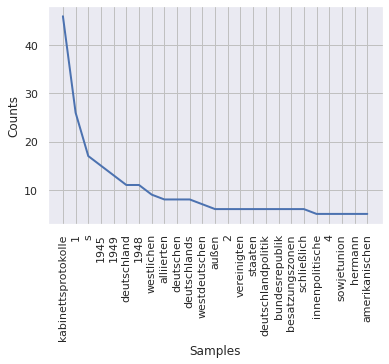

In [ ]:
#Get Word Frequency Distribution
import matplotlib.pyplot as plt
import seaborn as sns

#Display Inline chart
%matplotlib inline 
sns.set()

#Create freq distribution
freqdist1 =  nltk.FreqDist(words_ns)
freqdist1.plot(25)

In [ ]:
#Chunking of Data

ne_chunks = nltk.batch_ne_chunk(words_ns)

AttributeError: ignored

Install Additional stop words - stop-words - If Required. Curren

https://pypi.org/project/stop-words/


In [ ]:
#Import statements for processing
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings